In [107]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [108]:
data = pd.read_csv("./Cleaned-Data-1.csv")
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Severity
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,China,Severity_Mild
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,China,Severity_Mild
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,1,0,0,China,Severity_Mild
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,China,Severity_Moderate
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,China,Severity_Moderate


In [109]:
data.shape

(316800, 24)

In [110]:
data.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.471405,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


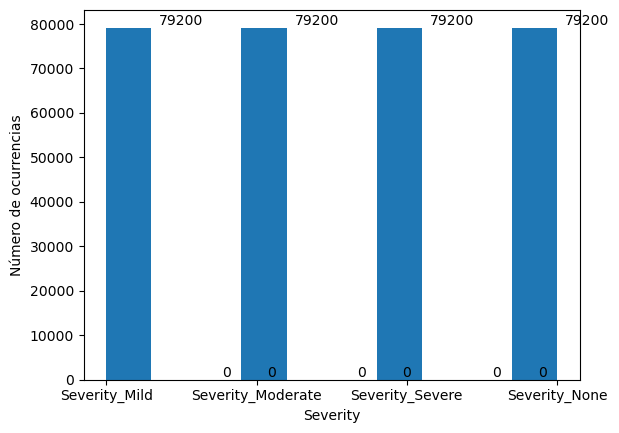

In [111]:
hist, bins, patches = plt.hist(data.Severity, bins=10, density=False)

# Ajusta automáticamente el rango en el eje Y
plt.ylim(auto=True)

# Etiqueta del eje X
plt.xlabel('Severity')

# Etiqueta del eje Y
plt.ylabel('Número de ocurrencias')

# Agregar etiquetas de texto a las columnas del histograma
for i in range(len(hist)):
    plt.text(bins[i] + 0.5, hist[i], str(int(hist[i])), ha='center', va='bottom')

# Muestra el histograma
plt.show()

In [112]:
data = pd.get_dummies(data, columns=['Country'])

In [113]:
predictors_covid = ["Fever", "Tiredness", "Dry-Cough", "Difficulty-in-Breathing", "Sore-Throat", "None_Sympton", "Pains", "Nasal-Congestion", "Runny-Nose", "Diarrhea", "None_Experiencing", "Age_0-9", "Age_10-19", "Age_20-24", "Age_25-59", "Age_60+", "Gender_Female", "Gender_Male", "Gender_Transgender", "Contact_Dont-Know", "Contact_No", "Contact_Yes"]
target_covid = ["Severity"]


In [114]:
predictors = data[predictors_covid]
target = data[target_covid]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(predictors,target, test_size=0.3, random_state=13)


[Text(0.678842278363428, 0.9736842105263158, 'x[19] <= 0.5\ngini = 0.75\nsamples = 221760\nvalue = [55435, 55469, 55297, 55559]'),
 Text(0.4564286582931299, 0.9210526315789473, 'x[11] <= 0.5\ngini = 0.75\nsamples = 147725\nvalue = [36855, 36943, 36740, 37187]'),
 Text(0.2927550921634987, 0.868421052631579, 'x[7] <= 0.5\ngini = 0.75\nsamples = 118158\nvalue = [29364, 29645, 29404, 29745]'),
 Text(0.16473458369058544, 0.8157894736842105, 'x[0] <= 0.5\ngini = 0.75\nsamples = 53585\nvalue = [13224, 13446, 13319, 13596]'),
 Text(0.10415765988793353, 0.7631578947368421, 'x[9] <= 0.5\ngini = 0.75\nsamples = 36852\nvalue = [9118, 9182, 9139, 9413]'),
 Text(0.05656601717225389, 0.7105263157894737, 'x[3] <= 0.5\ngini = 0.75\nsamples = 22144\nvalue = [5506, 5528, 5521, 5589]'),
 Text(0.030419615254564776, 0.6578947368421053, 'x[17] <= 0.5\ngini = 0.75\nsamples = 10095\nvalue = [2532, 2476, 2522, 2565]'),
 Text(0.019657521012462563, 0.6052631578947368, 'x[21] <= 0.5\ngini = 0.75\nsamples = 6751\nv

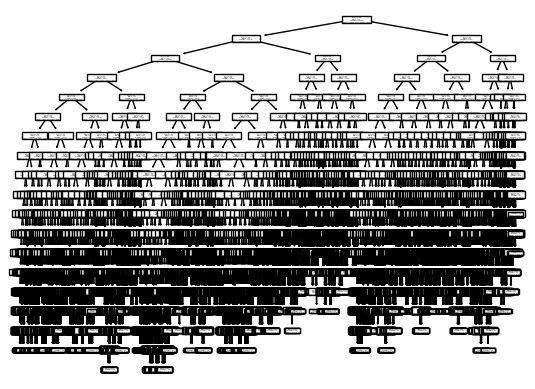

In [116]:
tree = DecisionTreeClassifier()

arbol = tree.fit(X_train, y_train)
plot_tree(arbol)

In [117]:
predicciones = arbol.predict(X_test)

pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=["Actual"], colnames=["Predicciones"])

Predicciones,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe
Actual,,,,
Severity_Mild,4925,7894,5957,4989
Severity_Moderate,9516,3382,5910,4923
Severity_None,9604,6990,2343,4966
Severity_Severe,9599,6970,5251,1821


In [118]:
acurracy = accuracy_score(y_test, predicciones)
acurracy

0.13121843434343433